## THE CLIFF WALKING PROBLEM

### Project by Vasta Francesca, Vu Billy

### Supervisor: Prof. Koebel Bertrand


In [1]:
#loading all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import pandas as pd
from collections import namedtuple

!pip install gym
import gym
import random
import itertools
import sys
from collections import defaultdict
from gym.envs.toy_text.cliffwalking import CliffWalkingEnv

import time
from IPython.display import clear_output

matplotlib.style.use('ggplot')
%matplotlib inline

These libraries are imported for:

- Numpy: For numerical operations, array manipulations, etc.
- Matplotlib: For plotting results and graphs.
- Pandas: For handling and analyzing data.
- Namedtuple: Helps create named tuples, which are useful for managing structured data
- Gym is a library used to create and interact with simulation environments for reinforcement learning tasks.
- CliffWalkingEnv is a test environment where the agent moves on a grid, trying to avoid falling off a cliff.
- time and IPython display functions are useful for dynamic visualization and managing the display (like clearing the screen during simulations).
- ggplot and matplotlib are used to set the plot style to ggplot and ensures that plots are displayed directly within Jupyter notebooks using %matplotlib inline.

In [2]:
# Create the CliffWalking environment with render order enforcing disabled
env = CliffWalkingEnv()
env.reset() 

(36, {'prob': 1})

**"CliffWalkingEnv()"** is an environment consists of a 4x12 grid where the agent starts in the bottom-left corner and must reach the goal in the bottom-right corner while avoiding a "cliff" along the bottom row. If the agent steps into the cliff, it gets a large negative reward and is sent back to the start. "env.reset()" is a method that resets the environment to its initial state, which is necessary before starting an episode. It typically returns the initial observation (the starting position of the agent).

In [3]:
# we set the actions
action = ["up", "right", "down", "left"]

#we check the elements of the environment

# 4x12 grid = 48 states
print("Number of states:", env.nS)


# left, up, down or right
print("\nNumber of actions an agent can take:", env.nA)


# Where am I? -> in "x" state
print ("Current state", env.s)

# What are my options? -> 4 action
print ("Transitions from current state:", env.P[env.s])

Number of states: 48

Number of actions an agent can take: 4
Current state 36
Transitions from current state: {0: [(1.0, 24, -1, False)], 1: [(1.0, 36, -100, False)], 2: [(1.0, 36, -1, False)], 3: [(1.0, 36, -1, False)]}


We set the possible actions: 
- "up": Move up on the grid.
- "right": Move right on the grid.
- "down": Move down on the grid.
- "left": Move left on the grid.

1. with "**env.nS**" we are calling a property of the environment and it returns us the **number of possible states**
2. with "**env.nA**"we are calling a property of the environment and it tells us the **number of actions** that the agent can take in any given state. In this environment, there are 4 possible actions: moving up, right, down, or left. So, env.nA will return 4.

3. "**env.s**"  shows the agent's current state, which is the **index** of the cell the agent is currently in. The environment starts in a specific state after calling env.reset(). 

4. "**env.P[env.s]**" is a dictionary which will give information on the current state's transitions. 
- The keys of the dictionary represent actions (0 for up, 1 for right, 2 for down, 3 for left)
- The values of the dictionary are lists containing tuples of the form:(probability, next_state, reward, done)  

Probability: The probability of taking this action and ending up in the next_state.
Next_state: The state the agent will transition to after taking the action.
Reward: The reward received after taking the action.
Done: A boolean indicating whether the episode ends after this transition (True if the agent reached the goal or fell off the cliff).

In [4]:
# EXAMPLE of taking a step by selecting a random action[up=0, right=1, down=2, left=3] from the current state
# current state = initial initial state cell 0 in row 0 (state 36)
# next state: Where do I end up?
# reward: What rewards did I recieve?
# is_terminal: did I end up in the goal state?
# t_prob: What is probability of ending up in next state taking that action?
rnd_action = random.randint(0, 3) #we select randomly an action from 0 to 3
print ("Action taken:", action[rnd_action])
next_state, reward, is_terminal, truncated_episode, info = env.step(rnd_action)
t_prob = info['prob']

print ("Transition probability:", t_prob)
print ("Next state:", next_state)
print ("Reward recieved:", reward)
print ("Terminal state:", is_terminal)

Action taken: down
Transition probability: 1.0
Next state: 36
Reward recieved: -1
Terminal state: False


This code simulates taking a random action in the CliffWalking environment and shows the results of that action, including the transition to the next state, the reward received, and whether the episode ends (reaching a terminal state). (so episode = going from starting position to terminal state)

"**env.step(rnd_action)**" is a function that applies the chosen random action in the environment and returns
- next_state: The state the agent transitions to after taking the action.
- reward: The reward received for taking the action.
- is_terminal: A boolean indicating whether the agent has reached a terminal state (such as falling into the cliff or reaching the goal).
- truncated_episode: In some environments, this can indicate if the episode was cut short (in this case, it might not be relevant).
- info: Extra information, such as transition probabilities

**info['prob']** This provides the probability of transitioning to the next state after taking the selected action

If the agent starts from the initial state (grid with index 36) and goes right, it falls from the cliff. The next state will be 36 with 100% because after falling from the cliff the agent will start again from the grid with index 36. 

### EXAMPLE OF THE GRID where the agent performs a pre-defined  set of actions

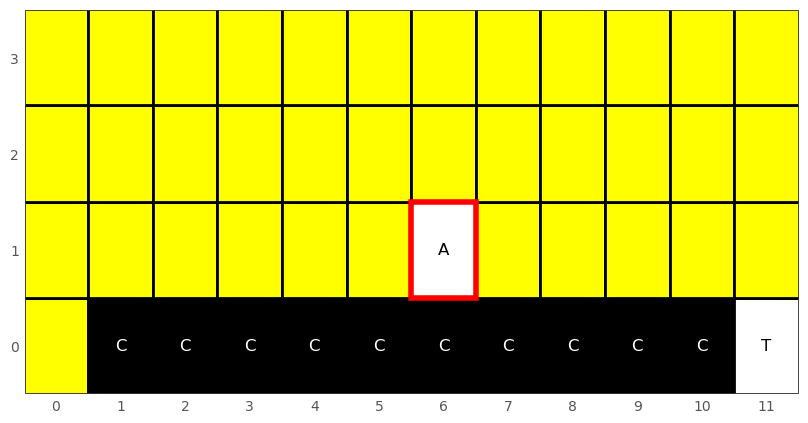

In [5]:
def plot_custom_grid(full_grid, current_position): 
    #full_grid is a 2D array
    #current_position is a tuple indicating the current coordinates of the agent in the grid
    colors = {'C': 'black', '': 'yellow', 'X': 'navy'}  # Add more mappings if needed
    
    # Map string values to numeric values
    numeric_grid = np.zeros_like(full_grid, dtype=float)
    for key, value in colors.items():
        numeric_grid[full_grid == key] = 1 if key == 'C' else 0  # Set to 1 for 'C', 0 for '' and 'X'

    fig, ax = plt.subplots(figsize=(10, 5))  # A Matplotlib figure and axis are created to plot the grid.
    #Adjust the size as needed

    # Plotting each cell individually to control borders
    for i in range(full_grid.shape[0]):#0 is the index of the first element of the .shape() = n. of rows 
        for j in range(full_grid.shape[1]): #1 is the index of the second element of the .shape() = n. of columns 
            value = full_grid[i, j]
            color = colors.get(value, 'white')  # Default to white if the value is not recognized

            # Draw grid cells
            rect = plt.Rectangle((j - 0.5, i - 0.5), 1, 1, linewidth=2, edgecolor='black', facecolor=color)
            ax.add_patch(rect)

            ax.text(j, i, value, ha='center', va='center', fontsize=12, color='black' if color == 'white' else 'white')
#The function loops through each cell in the grid and:
#1. Retrieves the cell value and corresponding color.
#2. Draws a rectangle for each cell with a black border and fills it with the designated color.
#3. Places the cell value in the center of the rectangle.
            
            
    # Highlight current agent's position with a red border
    agent_x, agent_y = current_position
    ax.add_patch(plt.Rectangle((agent_y - 0.5, agent_x - 0.5), 1, 1, linewidth=4, edgecolor='red', facecolor='none'))

    ax.set_xlim([-0.5, full_grid.shape[1] - 0.5])
    ax.set_ylim([-0.5, full_grid.shape[0] - 0.5])

    ax.set_xticks(np.arange(full_grid.shape[1]))
    ax.set_yticks(np.arange(full_grid.shape[0]))

    ax.tick_params(axis='both', which='both', length=0)  # Hide tick marks
    ax.xaxis.set_ticks_position('bottom')  # Show ticks on the bottom axis
    ax.yaxis.set_ticks_position('left')    # Show ticks on the left axis

    plt.grid(True, color='black', linewidth=2)  # Add grid lines
    plt.show()
# Example how to use
full_grid = np.full((4, 12), '', dtype='<U1')  # 4x12 grid
full_grid[0, 1:-1] = 'C'  # Cliff cells
full_grid[0, 11] = 'T'    # Terminal state (goal)

current_position = (1, 6)  # Example current position (row, column)

# Mark the current position with 'A' (for the agent)
full_grid[current_position] = 'A'

# Plot the custom grid
plot_custom_grid(full_grid, current_position)

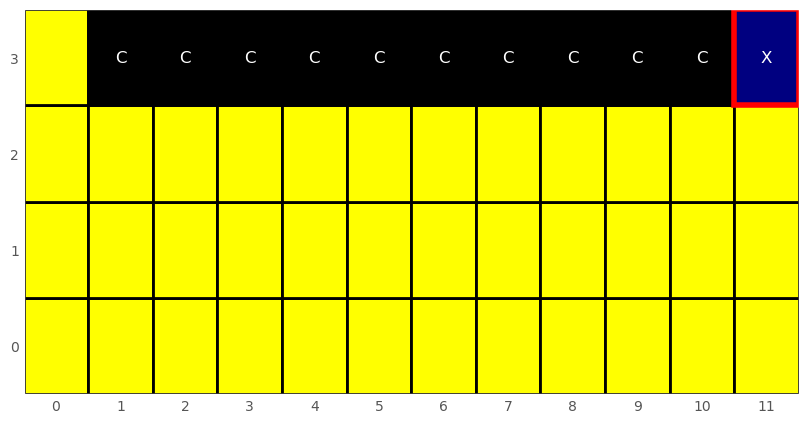

Final state (labeled as next): 47 Is Terminal State? True


In [6]:
import time
from IPython.display import clear_output

#time is used for pauses in the simulation.
#clear_output from IPython.display is used to clear previous outputs in Jupyter notebooks for real-time updates.

env.reset() #The environment is reset to start a new episode.
actions = [0, 1, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2]  # Predefined action sequence

for i in range(len(actions)):
    print("Step Nr.:", i+1, "| Current state:", env.s)
    action = actions[i]
    
#A loop iterates through the predefined actions. 
#For each action, it prints the current step number and the agent's state.
    
    # Correctly unpack the output from env.step()
    next_state, reward, is_terminal, truncated_episode, info = env.step(action)
    #The selected action is executed using env.step(action)
    t_prob = info['prob']  # Extract transition probability
    
    # Convert next_state (index) into coordinates for visualization
    current_position = np.unravel_index(next_state, env.shape)
    #The next_state index is converted into a coordinate (row, column) format using np.unravel_index.
    
    print("\nAction taken:", action, "Current Position:", current_position)
    
    # Create and update the full grid
    full_grid = np.full(env.shape, '', dtype='<U1') #A grid is created to visualize the environment
    full_grid[3, 1:-1] = 'C'  # Cliffs
    full_grid[3, 11] = 'T'    # Terminal state (goal)
    full_grid[current_position] = 'X'  # Agent's position

    # Plot the grid
    plot_custom_grid(full_grid, current_position) 
    #The plot_custom_grid function is called to visualize the grid with the agent's position.
    
    #The grid is displayed for 2 seconds, and then the previous output is cleared for the next step.
    plt.pause(2) 
    clear_output(wait=True)  # Clear previous output for real-time updates

# Plot the final grid and display return values
plot_custom_grid(full_grid, current_position)
print("Final state (labeled as next):", next_state, "Is Terminal State?", is_terminal)

### POLICY DEFINITION

With the following code we are defining a function to create an epsilon-greedy policy based on a Q-function.
The Q-function, also known as the action-value function, represents the expected return (cumulative future reward) of taking a particular action in a given state, and then following a certain policy thereafter
The Q-function 𝑄(𝑠,𝑎)  provides the expected reward for taking action 𝑎 in state 𝑠 and then following a policy 𝜋(which could be the epsilon-greedy policy you implemented).


Why the action-value function? The Q-function is central to many reinforcement learning algorithms, such as Q-learning and SARSA. The goal is to learn the optimal Q-function, which enables the agent to make decisions that maximize its cumulative reward over time.
The epsilon-greedy policy you implemented uses the Q-values to determine the best action to take while also allowing for exploration (random actions) based on the value of epsilon.

In [7]:
from collections import namedtuple, defaultdict
import numpy as np
import itertools

EpisodeStats = namedtuple("Stats", ["episode_lengths", "episode_rewards"])
#This creates a simple data structure to keep track of episode lengths and rewards, making it easy 
#to store and access this information.

def make_epsilon_greedy_policy(Q, epsilon, nA):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.
    
    Args:
        Q: A dictionary that maps states to action values.
            Each value is a numpy array of length nA (number of actions).
        epsilon: The probability to select a random action, float between 0 and 1.
        nA: Number of actions in the environment.
    
    Returns:
        A function that takes an observation (state) as an argument and returns
        the probabilities for each action in the form of a numpy array of length nA.
    """
    def policy_fn(state):
        action_probabilities = np.ones(nA, dtype=float) * (epsilon / nA)
        #action probabilities onitializes a numpy array where each action has a base probability 
        #of epsilon / nA (the probability of choosing a random action).
        best_action = np.argmax(Q[state])
        #best-action finds the action with the highest Q-value for the given state using np.argmax.
        action_probabilities[best_action] += (1.0 - epsilon)
        #we adjust the probability of choosing the best action 
        #In particular, we increases the probability of selecting the best action by adding (1.0 - epsilon) to it.
        #This ensures that with probability 1 - epsilon, the agent selects the best-known action, while 
        #with probability epsilon, it explores other actions.
        return action_probabilities
    
    
    return policy_fn

If we print Q we'll get a dictionary that maps each state in the environment to an array of Q-values for each possible action.

The keys are the state indices (e.g., integers representing each state in your environment).
The values are numpy arrays containing Q-values for each action available in that state. (= the expected future reward)
Each array represents the expected future rewards for taking each action from that state and following the current policy. Higher values indicate better actions according to the learned policy.

### DEFINITION OF THE ALGORITHMS WITH "epsilon_decay"

**Version of the algorithms using the epsilon_decay**

With an epsilon_decay there is early exploration at the beginning and gradual shift to exploitation

**Balanced Exploration-Exploitation Trade-off**:
- Exploration: In the early stages of training, when the agent has little knowledge about the environment, it is beneficial to explore by taking random actions (high epsilon). This allows the agent to discover new states and actions, which helps it learn about the environment's dynamics.
- Exploitation: Over time, as the agent becomes more knowledgeable, it should increasingly focus on exploiting the best-known actions rather than continuing to explore randomly. Reducing epsilon (decaying) over time shifts the behavior from exploration to exploitation, allowing the agent to take actions that maximize its expected rewards based on what it has learned.

**Efficient Learning**:
- Early Exploration: At the beginning of training, a higher epsilon ensures the agent does not get stuck in suboptimal policies because it explores a wider range of actions.
- Gradual Shift to Exploitation: Epsilon decay ensures that exploration is reduced gradually. This allows the agent to focus more on actions that have been identified as optimal, resulting in faster convergence to a near-optimal policy as learning progresses.

**Avoiding Local Optimal**: 
- Randomization to Avoid Traps: Decaying epsilon helps the agent avoid falling into local optimal too early. If the agent exploits too soon (without enough exploration), it might settle on a suboptimal policy that doesn't maximize long-term rewards. A higher initial epsilon with decay helps to search for better policies more effectively.

### DEFINITION OF THE SARSA ALGORITHM 

In [8]:
def sarsa_decay(env, num_episodes, discount_factor=1.0, alpha=0.5, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.1):
    """
    SARSA algorithm: On-policy TD control. Finds the optimal epsilon-greedy policy.
    
    Args:
        env: OpenAI environment.
        num_episodes: Number of episodes to run for.
        discount_factor: Gamma (γ) discount factor.
        alpha: Step size (α), TD learning rate.
        epsilon: Initial probability to sample a random action, between 0 and 1.
        epsilon_decay: Decay rate of epsilon after each episode.
        epsilon_min: Minimum value that epsilon will decay to.
    
    Returns:
        A tuple (Q, stats_decay) where Q is the optimal action-value function, 
        a dictionary mapping state -> action values, and stats_decay is an EpisodeStats 
        object with two numpy arrays for episode_lengths and episode_rewards.
    """
    
    # Initialize the action-value function Q with zeros for all state-action pairs.
    Q_sarsa_decay = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # Stats object keeps track of the rewards and lengths of episodes.
    stats_sarsa_decay = EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes)
    )

    for i_episode in range(num_episodes):
        # Decay epsilon after each episode, but ensure it doesn't go below the minimum epsilon
        epsilon = max(epsilon_min, epsilon * epsilon_decay)
        
        # Print progress every 100 episodes
        if (i_episode + 1) % 100 == 0:
            print(f"Episode {i_episode + 1}/{num_episodes} completed. Epsilon: {epsilon:.4f}")
        
        # Initialize the state
        state, _ = env.reset() if isinstance(env.reset(), tuple) else (env.reset(), {})
        
        # Choose action A from state S using the epsilon-greedy policy
        action_probabilities = make_epsilon_greedy_policy(Q_sarsa_decay, epsilon, env.action_space.n)(state)
        action = np.random.choice(np.arange(len(action_probabilities)), p=action_probabilities)
        
        # Loop for each step of the episode
        for t in itertools.count():
            # Take action A, observe reward R and next state S'
            next_state, reward, is_terminal, truncated, _ = env.step(action)
            
            # Choose next action A' from S' using the epsilon-greedy policy
            next_action_probabilities = make_epsilon_greedy_policy(Q_sarsa_decay, epsilon, env.action_space.n)(next_state)
            next_action = np.random.choice(np.arange(len(next_action_probabilities)), p=next_action_probabilities)
            
            # Calculate the TD target and TD error
            td_target = reward + discount_factor * Q_sarsa_decay[next_state][next_action]
            td_error = td_target - Q_sarsa_decay[state][action]
            
            # Update Q-value for current state-action pair
            Q_sarsa_decay[state][action] += alpha * td_error
            
            # Update statistics
            stats_sarsa_decay.episode_rewards[i_episode] += reward
            stats_sarsa_decay.episode_lengths[i_episode] = t + 1  # t starts from 0
            
            # Break if terminal state or truncated
            if is_terminal or truncated:
                break
            
            # Update state and action
            state = next_state
            action = next_action
    
    return Q_sarsa_decay, stats_sarsa_decay


### DEFINITION OF THE Q-LEARNING ALGORITHM

The q_learning_decay function looks quite similar to the sarsa_decay function, but there are important differences between Q-learning and SARSA.


Action selection in SARSA vs. Q-learning:
In Q-learning, you use the next state (next_state) to find the maximum possible Q-value np.max(Q_q_decay[next_state])) for the TD update. This is an off-policy method.
In SARSA, you use the actual next action (next_action) chosen by your current policy (which could be epsilon-greedy). This makes it an on-policy method.
SARSA action-value update:

SARSA uses Q(S, A) and updates it based on the expected Q-value for the specific action chosen in the next state (Q(S', A')).



In your SARSA code: You choose the next action using the current policy (epsilon-greedy) and then update Q(S,A) using the chosen action's Q-value.
Whereas, in Q-learning: You directly update Q(S,A) using the maximum Q-value of the next state.


In [9]:
def q_learning_decay(env, num_episodes, discount_factor=1.0, alpha=0.5, epsilon=1.0, epsilon_decay=0.995, min_epsilon=0.1):
    """
    Q-Learning algorithm with epsilon decay.
    
    Args:
        env: OpenAI environment.
        num_episodes: Number of episodes to run for.
        discount_factor: Gamma (γ) discount factor.
        alpha: Step size (α), TD learning rate.
        epsilon: Starting epsilon value for epsilon-greedy policy.
        epsilon_decay: The rate at which epsilon decays after each episode.
        min_epsilon: The minimum value that epsilon can decay to.
    
    Returns:
        Q, stats: Tuple containing the optimal Q-table and statistics.
    """
    
    # Initialize Q-table
    Q_q_decay = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # Initialize statistics
    stats_q_decay = EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes)
    )

    # The policy derived from Q, using an epsilon-greedy approach
    policy = make_epsilon_greedy_policy(Q_q_decay, epsilon, env.action_space.n)

    for i_episode in range(num_episodes):
        # Decay epsilon after each episode, but ensure it doesn't go below the minimum epsilon
        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        
        # Update the epsilon-greedy policy with the decayed epsilon
        policy = make_epsilon_greedy_policy(Q_q_decay, epsilon, env.action_space.n)

        # Print progress every 100 episodes
        if (i_episode + 1) % 100 == 0:
            print(f"Episode {i_episode + 1}/{num_episodes} completed. Epsilon: {epsilon:.4f}")
        
        # Initialize the state
        state, _ = env.reset() if isinstance(env.reset(), tuple) else (env.reset(), {})

        # Loop for each step of the episode
        for t in itertools.count():
            # Choose action A from state S using policy derived from Q (epsilon-greedy)
            action_probabilities = policy(state)
            action = np.random.choice(np.arange(len(action_probabilities)), p=action_probabilities)

            # Take action A, observe R, S'
            next_state, reward, is_terminal, truncated, _ = env.step(action)

            # Update Q(S,A)
            td_target = reward + discount_factor * np.max(Q_q_decay[next_state])
            td_error = td_target - Q_q_decay[state][action]
            Q_q_decay[state][action] += alpha * td_error

            # Update statistics
            stats_q_decay.episode_rewards[i_episode] += reward
            stats_q_decay.episode_lengths[i_episode] = t + 1  # t starts from 0

            # End the episode if in terminal state
            if is_terminal or truncated:
                break

            # S ← S'
            state = next_state

    return Q_q_decay, stats_q_decay

### Initialization of SARSA

In [10]:
Q_sarsa_decay, stats_sarsa_decay = sarsa_decay(env, 0) #initilization 
# get greedy policy from Q
policy_init_sarsa= np.array([np.argmax(Q_sarsa_decay[key]) if key in Q_sarsa_decay else -1 for key in np.arange(48)])
reshaped_policy_init_sarsa = np.reshape(policy_init_sarsa, (4, 12))


# get value function from Q using greedy policy
v_init_sarsa = ([np.max(Q_sarsa_decay[key]) if key in Q_sarsa_decay else 0 for key in np.arange(48)])
reshaped_v_init_sarsa = np.reshape(v_init_sarsa, (4, 12))


In [11]:
#visualizing policy
reshaped_policy_init_sarsa

array([[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]])

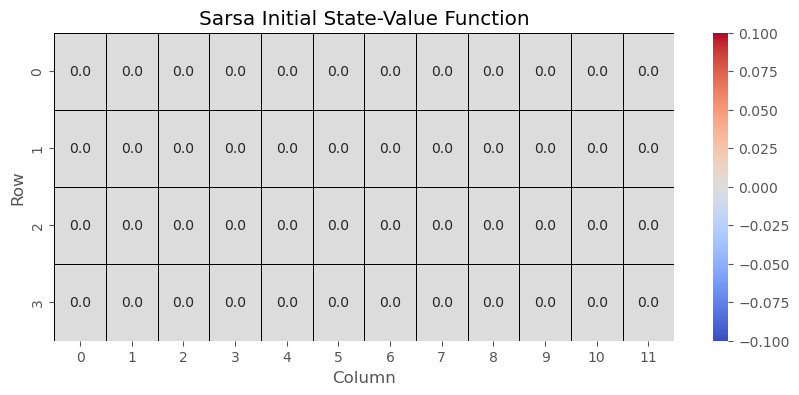

In [12]:
#visualizing the Q-value matrix
import seaborn as sns

# creation of heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(reshaped_v_init_sarsa, annot=True, fmt=".1f", cmap="coolwarm", cbar=True, linewidths=0.5, linecolor='black')

# Title
plt.title("Sarsa Initial State-Value Function")
plt.xlabel("Column")
plt.ylabel("Row")

# Show heatmap
plt.show()

### Initialization of Q-Learning

In [13]:
Q_q_decay, stats_q_decay = q_learning_decay(env, 0) #initilization 
# get greedy policy from Q
policy_init_q= np.array([np.argmax(Q_q_decay[key]) if key in Q_q_decay else -1 for key in np.arange(48)])
reshaped_policy_init_q = np.reshape(policy_init_q, (4, 12))


# get value function from Q using greedy policy
v_init_q = ([np.max(Q_q_decay[key]) if key in Q_q_decay else 0 for key in np.arange(48)])
reshaped_v_init_q = np.reshape(v_init_q, (4, 12))


In [14]:
#visualizing policy
reshaped_policy_init_q

array([[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]])

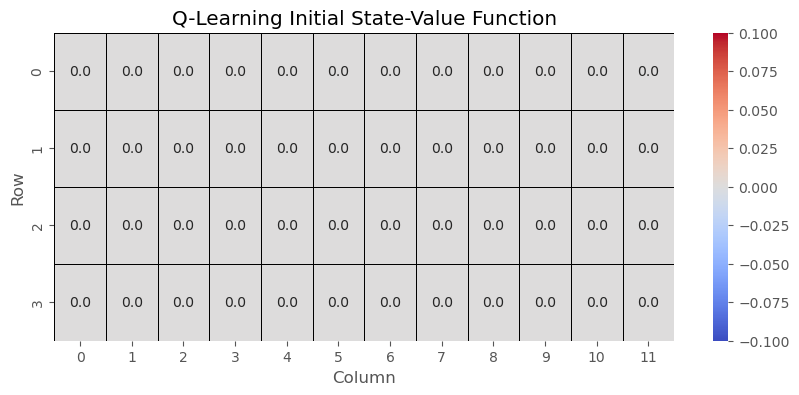

In [15]:
#visualizing the Q-value matrix
import seaborn as sns

# creation of heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(reshaped_v_init_q, annot=True, fmt=".1f", cmap="coolwarm", cbar=True, linewidths=0.5, linecolor='black')

# Title
plt.title("Q-Learning Initial State-Value Function")
plt.xlabel("Column")
plt.ylabel("Row")

# Show heatmap
plt.show()

### TRAINING WITH 500 EPISODES

#### SARSA TRAINING

Episode 100/500 completed. Epsilon: 0.6058
Episode 200/500 completed. Epsilon: 0.3670
Episode 300/500 completed. Epsilon: 0.2223
Episode 400/500 completed. Epsilon: 0.1347
Episode 500/500 completed. Epsilon: 0.1000


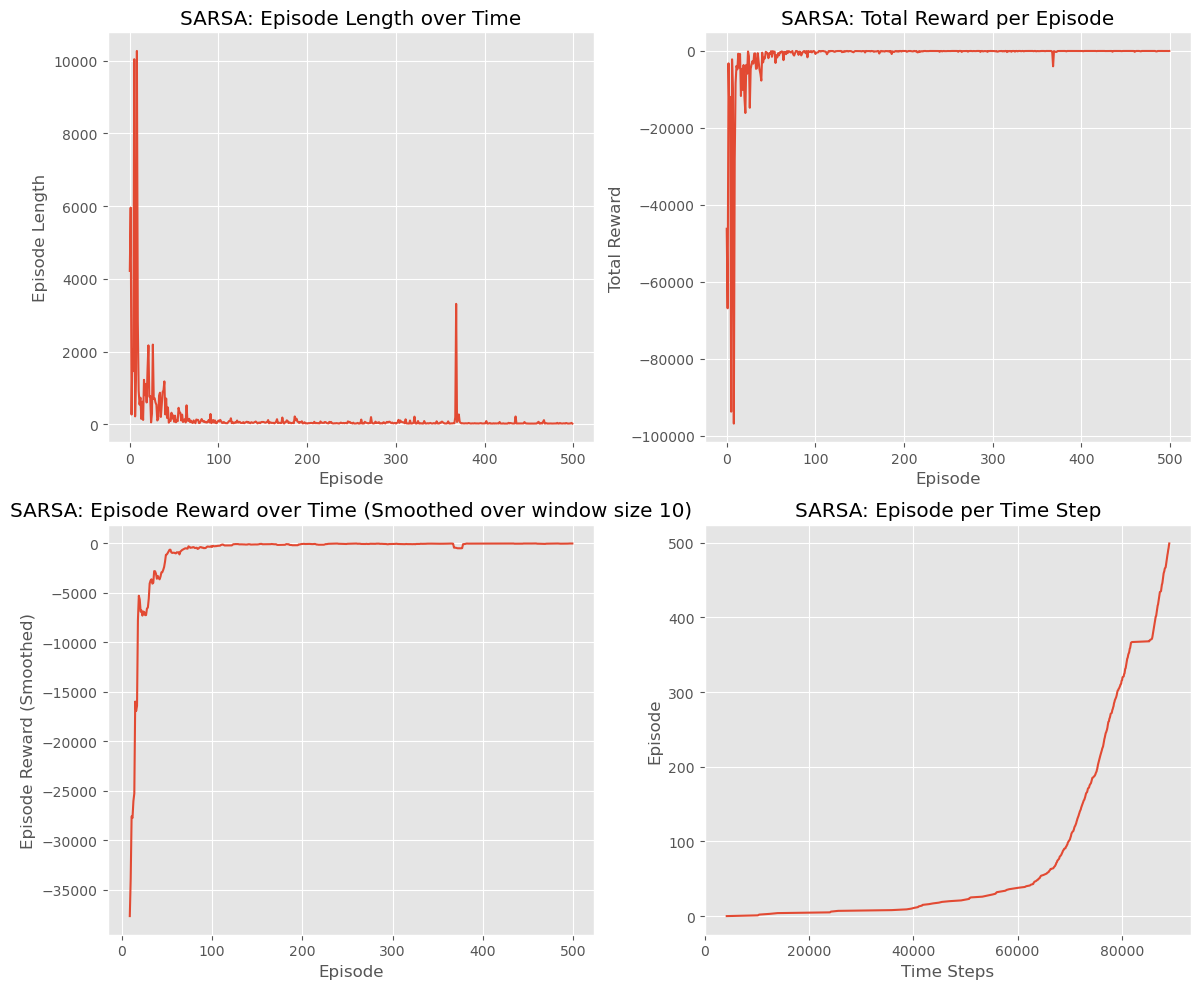

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example usage
num_episodes = 500

# Run Q-Learning to get the optimal Q-values and statistics
Q_sarsa_decay, stats_sarsa_decay = sarsa_decay(env, num_episodes)

def plot_episode_stats(stats_decay, smoothing_window=10, noshow=False):
    # Create a figure with a 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # Plot the episode length over time
    axs[0, 0].plot(stats_sarsa_decay.episode_lengths)
    axs[0, 0].set_xlabel("Episode")
    axs[0, 0].set_ylabel("Episode Length")
    axs[0, 0].set_title("SARSA: Episode Length over Time")

    # Plot the rewards over time
    axs[0, 1].plot(stats_sarsa_decay.episode_rewards)
    axs[0, 1].set_xlabel('Episode')
    axs[0, 1].set_ylabel('Total Reward')
    axs[0, 1].set_title('SARSA: Total Reward per Episode')

    # Plot the smoothed episode rewards over time
    rewards_smoothed = pd.Series(stats_sarsa_decay.episode_rewards).rolling(smoothing_window, min_periods=smoothing_window).mean()
    axs[1, 0].plot(rewards_smoothed)
    axs[1, 0].set_xlabel("Episode")
    axs[1, 0].set_ylabel("Episode Reward (Smoothed)")
    axs[1, 0].set_title("SARSA: Episode Reward over Time (Smoothed over window size {})".format(smoothing_window))

    # Plot time steps and episode number
    axs[1, 1].plot(np.cumsum(stats_sarsa_decay.episode_lengths), np.arange(len(stats_sarsa_decay.episode_lengths)))
    axs[1, 1].set_xlabel("Time Steps")
    axs[1, 1].set_ylabel("Episode")
    axs[1, 1].set_title("SARSA: Episode per Time Step")

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plots
    plt.show()

# Call the function to plot the stats
plot_episode_stats(stats_sarsa_decay)

## GRAPH INTERPRETATION

The graphs provided offer useful insights into how the SARSA agent is learning over time. 


1. **First Plot: Episode Length over Time**:
**What it shows** This graph displays the number of time steps (or actions) taken by the agent in each episode.
**Interpretation**:
- Initial Variability: At the start, there is a wide range in episode lengths, indicating inconsistency in the agent's performance. This variability suggests that the agent is still exploring the environment and trying out many different paths, leading to episodes of varying lengths.
- Gradual Decrease: As training progresses (moving rightward), you can see a gradual decrease in episode lengths, particularly after around 200 episodes. This indicates that the agent is learning to complete episodes more efficiently and effectively, suggesting better decision-making.
- Stable Period: After around 500 episodes, the episode lengths stabilize at a lower level, reflecting that the agent has found a more effective strategy that requires fewer actions to achieve the goal. This aligns with the notion that the agent is converging toward a more optimal policy.

2. **Second Plot: Total Reward per Episode**
**What it shows**: This plot illustrates the total reward the agent received in each episode.
**Interpretation**:
- Negative Rewards Initially: In the early episodes, the agent tends to accumulate significantly negative rewards. This indicates that the agent's actions were often resulting in unfavorable outcomes, possibly due to poor decisions or exploration.
- Learning and Improvement: After approximately 100 episodes, the total rewards begin to improve, and you can see some positive rewards appear. This suggests that the agent is learning from its experiences and beginning to adopt better strategies.
- Plateau: Similar to the previous graphs, you notice a plateauing effect where the total reward stabilizes after around 800 episodes. This suggests that the agent has reached a point where it consistently achieves a certain level of performance, indicating that it has learned an effective policy for the given task.

3. **Third Plot: Episode Reward over Time (Smoothed)** 
**What it shows** This plot tracks the total rewards that the agent receives in each episode, with a smoothed line to remove noise and show a general trend over time.
**Interpretation**: 
- Initial Drop: The steep negative drop at the beginning suggests that the agent was receiving significantly negative rewards during the early episodes. This might be due to exploration (random actions leading to poor decisions and suboptimal paths).
- Rapid Recovery: After around 100 episodes, the rewards stabilize and become less negative. This is a sign that the agent has started learning better policies, improving its performance and receiving better rewards.
- Plateau: The smoothed rewards remain relatively stable after around 400 episodes, which suggests that the agent has found a reasonably good policy and is consistently executing it with little change. The fact that the rewards don’t keep increasing suggests the agent might have found a near-optimal policy and is sticking to it, with little further improvement.

4. **Fourth Plot: Episode per Time Step**
**What it shows**: This graph plots the cumulative time steps (on the x-axis) against the number of episodes completed (on the y-axis). Essentially, it tracks how quickly episodes are being completed over time.
**Interpretation**:
- Slow Start: In the beginning, the slope is relatively flat, which means the agent is taking a lot of time steps to complete each episode. This is expected in early training when the agent is exploring a lot and may be taking many inefficient actions.
- Sharp Increase: After around 100,000 time steps, the number of episodes completed increases sharply, indicating that the agent is completing episodes much faster. This suggests that the agent has learned an efficient policy that enables it to reach the terminal state (end of an episode) in fewer time steps. The agent is now exploiting what it has learned, leading to faster episode completion


### Overall Interpretation ## 
In the beginning, the agent was learning and exploring, leading to poor performance (negative rewards and slow episode completion). The agent struggled, but over time it began to stabilize its episode lengths and improve its rewards. The decrease in episode lengths and the stabilization of rewards point towards the agent's ability to effectively navigate its environment and optimize its decision-making strategies. The stabilization in rewards indicates that the agent is converging to a stable policy, though there may still be room for further improvement or fine-tuning.

#### Q-LEARNING TRAINING

Episode 100/500 completed. Epsilon: 0.6058
Episode 200/500 completed. Epsilon: 0.3670
Episode 300/500 completed. Epsilon: 0.2223
Episode 400/500 completed. Epsilon: 0.1347
Episode 500/500 completed. Epsilon: 0.1000


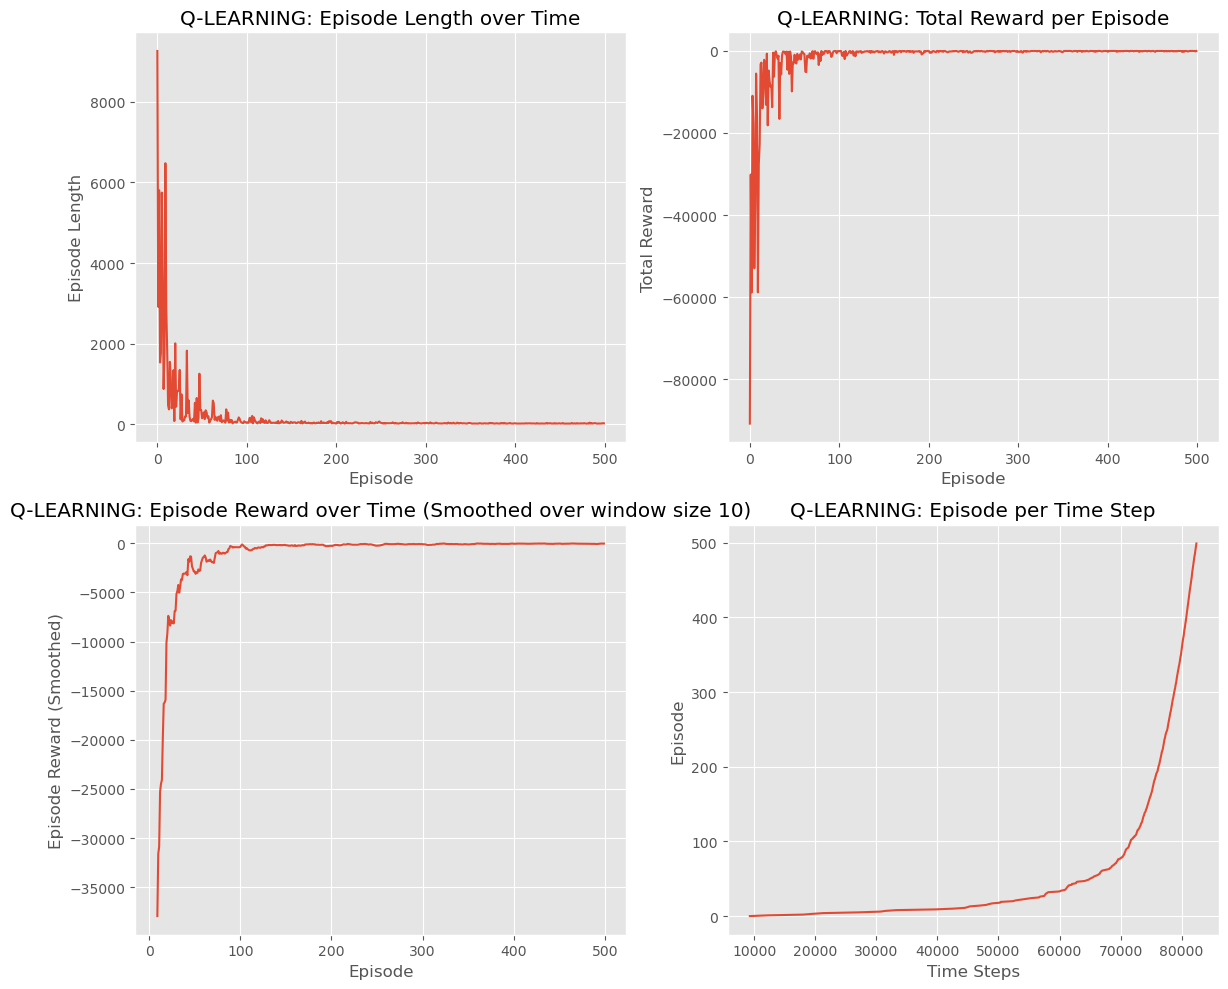

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example usage
num_episodes = 500

# Run Q-Learning to get the optimal Q-values and statistics
Q_q_decay, stats_q_decay = q_learning_decay(env, num_episodes)

def plot_episode_stats(stats, smoothing_window=10, noshow=False):
    # Create a figure with a 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # Plot the episode length over time
    axs[0, 0].plot(stats_q_decay.episode_lengths)
    axs[0, 0].set_xlabel("Episode")
    axs[0, 0].set_ylabel("Episode Length")
    axs[0, 0].set_title("Q-LEARNING: Episode Length over Time")

    # Plot the rewards over time
    axs[0, 1].plot(stats_q_decay.episode_rewards)
    axs[0, 1].set_xlabel('Episode')
    axs[0, 1].set_ylabel('Total Reward')
    axs[0, 1].set_title('Q-LEARNING: Total Reward per Episode')

    # Plot the smoothed episode rewards over time
    rewards_smoothed = pd.Series(stats_q_decay.episode_rewards).rolling(smoothing_window, min_periods=smoothing_window).mean()
    axs[1, 0].plot(rewards_smoothed)
    axs[1, 0].set_xlabel("Episode")
    axs[1, 0].set_ylabel("Episode Reward (Smoothed)")
    axs[1, 0].set_title("Q-LEARNING: Episode Reward over Time (Smoothed over window size {})".format(smoothing_window))

    # Plot time steps and episode number
    axs[1, 1].plot(np.cumsum(stats_q_decay.episode_lengths), np.arange(len(stats_q_decay.episode_lengths)))
    axs[1, 1].set_xlabel("Time Steps")
    axs[1, 1].set_ylabel("Episode")
    axs[1, 1].set_title("Q-LEARNING: Episode per Time Step")

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plots
    plt.show()

# Call the function to plot the stats
plot_episode_stats(stats_q_decay)

## EXTRACTING THE Q-VALUES and OPTIMAL POLICY

### SARSA OPTIMAL Q-VALUES

In [18]:
# get greedy policy from Q
policy_trained_sarsa= np.array([np.argmax(Q_sarsa_decay[key]) if key in Q_sarsa_decay else -1 for key in np.arange(48)])
reshaped_policy_trained_sarsa = np.reshape(policy_trained_sarsa, (4, 12))


# get value function from Q using greedy policy
v_trained_sarsa = ([np.max(Q_sarsa_decay[key]) if key in Q_sarsa_decay else 0 for key in np.arange(48)])
reshaped_v_trained_sarsa = np.reshape(v_trained_sarsa, (4, 12))

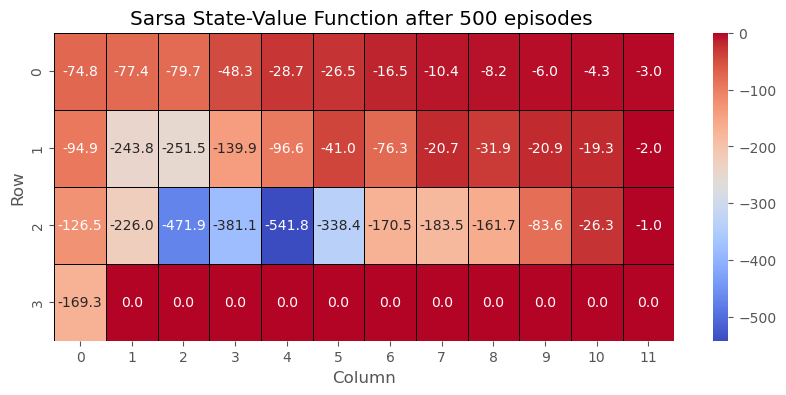

In [19]:
#visualizing the Q-values
import seaborn as sns

# creation of heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(reshaped_v_trained_sarsa, annot=True, fmt=".1f", cmap="coolwarm", cbar=True, linewidths=0.5, linecolor='black')

# Title
plt.title("Sarsa State-Value Function after 500 episodes ")
plt.xlabel("Column")
plt.ylabel("Row")

# Show heatmap
plt.show()

### SARSA OPTIMAL POLICY

In [20]:
# Assuming `policy` and `v` are already defined and have length 48
action = ["up", "right", "down", "left"]
actions = np.array(action)  # Convert action list to a NumPy array for easier indexing

# Print reshaped grid policy
print("SARSA: Reshaped Grid Policy:")
print(reshaped_policy_trained_sarsa)
print("")

# Print the optimal policy
print("SARSA Optimal Policy:")
optimal_policy_sarsa = np.take(actions, reshaped_policy_trained_sarsa)  # Use np.take to get actions for the optimal policy
print(optimal_policy_sarsa)
print("")

SARSA: Reshaped Grid Policy:
[[ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0  0  1  0  0  0  0  0  0  0  1  2]
 [ 0  3  0  0  0  1  0  0  0  0  0  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0]]

SARSA Optimal Policy:
[['right' 'right' 'right' 'right' 'right' 'right' 'right' 'right' 'right'
  'right' 'right' 'down']
 ['up' 'up' 'right' 'up' 'up' 'up' 'up' 'up' 'up' 'up' 'right' 'down']
 ['up' 'left' 'up' 'up' 'up' 'right' 'up' 'up' 'up' 'up' 'up' 'down']
 ['up' 'left' 'left' 'left' 'left' 'left' 'left' 'left' 'left' 'left'
  'left' 'up']]



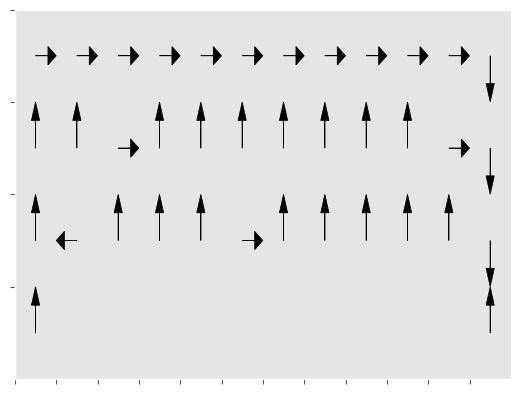

In [21]:
#Alternative visualization of the optimal policy

# Map policy values to directions
# Note: Assuming 0=UP, 1=RIGHT, 2=DOWN, 3=LEFT, -1=no action
directions = {
    0: (0, -1),
    1: (1, 0),
    2: (0, 1),
    3: (-1, 0),
    -1: (0, 0)  # No movement for -1
}

fig, ax = plt.subplots()

# Size of the grid
nrows, ncols = reshaped_policy_trained_sarsa.shape

# Create a grid of points
ax.set_xlim(0, ncols)
ax.set_ylim(0, nrows)
plt.gca().invert_yaxis()  # Invert y axis to have the first row at the top

# Plot arrows for each policy direction
for y in range(nrows):
    for x in range(ncols):
        dx, dy = directions[reshaped_policy_trained_sarsa[y, x]]
        if reshaped_policy_trained_sarsa[y, x] != -1:  # If action is defined
            ax.arrow(x + 0.5, y + 0.5, dx * 0.3, dy * 0.3, head_width=0.2, head_length=0.2, fc='k', ec='k')

# Additional settings for clarity
ax.set_xticks(np.arange(0, ncols, 1))
ax.set_yticks(np.arange(0, nrows, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(which='both')

plt.show()

### Q-LERNING OPTIMAL Q-VALUES MATRIX

In [22]:
# get greedy policy from Q
policy_trained_q= np.array([np.argmax(Q_q_decay[key]) if key in Q_q_decay else -1 for key in np.arange(48)])
reshaped_policy_trained_q = np.reshape(policy_trained_q, (4, 12))


# get value function from Q using greedy policy
v_trained_q = ([np.max(Q_q_decay[key]) if key in Q_q_decay else 0 for key in np.arange(48)])
reshaped_v_trained_q = np.reshape(v_trained_q, (4, 12))

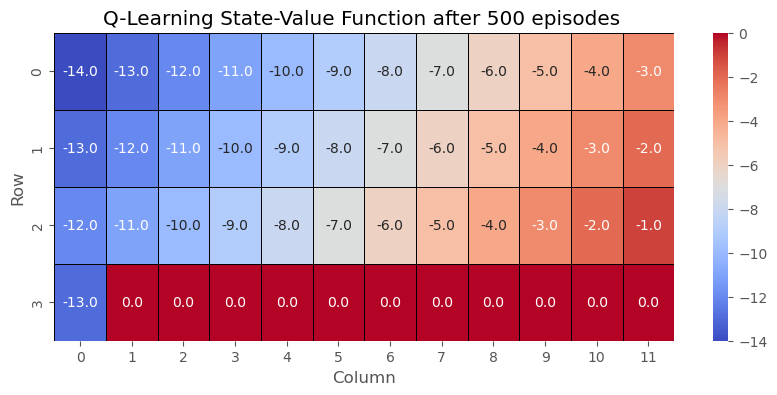

In [23]:
#visualizing the Q-values
import seaborn as sns

# creation of heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(reshaped_v_trained_q, annot=True, fmt=".1f", cmap="coolwarm", cbar=True, linewidths=0.5, linecolor='black')

# Title
plt.title("Q-Learning State-Value Function after 500 episodes ")
plt.xlabel("Column")
plt.ylabel("Row")

# Show heatmap
plt.show()

In [24]:
# Assuming `policy` and `v` are already defined and have length 48

# Print reshaped grid policy
print("Q-LEARNING: Reshaped Grid Policy:")
print(reshaped_policy_trained_q)
print("")

# Print the optimal policy
print("Q-LEARNING: Optimal Policy:")
optimal_policy_sarsa = np.take(actions, reshaped_policy_trained_q)  # Use np.take to get actions for the optimal policy
print(optimal_policy_sarsa)
print("")

Q-LEARNING: Reshaped Grid Policy:
[[ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0]]

Q-LEARNING: Optimal Policy:
[['right' 'right' 'right' 'right' 'right' 'right' 'right' 'right' 'right'
  'right' 'right' 'down']
 ['right' 'right' 'right' 'right' 'right' 'right' 'right' 'right' 'right'
  'right' 'right' 'down']
 ['right' 'right' 'right' 'right' 'right' 'right' 'right' 'right' 'right'
  'right' 'right' 'down']
 ['up' 'left' 'left' 'left' 'left' 'left' 'left' 'left' 'left' 'left'
  'left' 'up']]



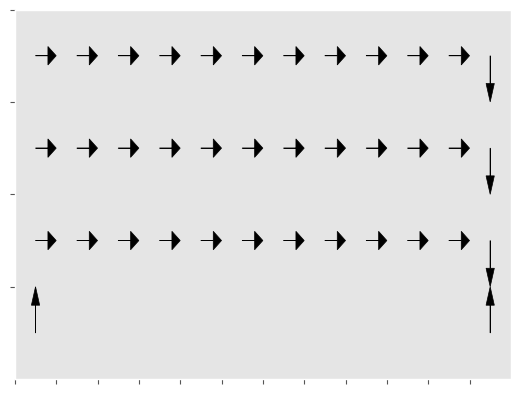

In [25]:
#Alternative visualization of the optimal policy

# Map policy values to directions
# Note: Assuming 0=UP, 1=RIGHT, 2=DOWN, 3=LEFT, -1=no action
directions = {
    0: (0, -1),
    1: (1, 0),
    2: (0, 1),
    3: (-1, 0),
    -1: (0, 0)  # No movement for -1
}

fig, ax = plt.subplots()

# Size of the grid
nrows, ncols = reshaped_policy_trained_q.shape

# Create a grid of points
ax.set_xlim(0, ncols)
ax.set_ylim(0, nrows)
plt.gca().invert_yaxis()  # Invert y axis to have the first row at the top

# Plot arrows for each policy direction
for y in range(nrows):
    for x in range(ncols):
        dx, dy = directions[reshaped_policy_trained_q[y, x]]
        if reshaped_policy_trained_q[y, x] != -1:  # If action is defined
            ax.arrow(x + 0.5, y + 0.5, dx * 0.3, dy * 0.3, head_width=0.2, head_length=0.2, fc='k', ec='k')

# Additional settings for clarity
ax.set_xticks(np.arange(0, ncols, 1))
ax.set_yticks(np.arange(0, nrows, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(which='both')

plt.show()

### Evalution of the policy and computation of average reward

### SARSA

In [26]:
def evaluate_policy_sarsa(env, Q_sarsa_decay, num_episodes):
    total_rewards = 0
    for episode in range(num_episodes):
        state, _ = env.reset()
        is_terminal = False
        episode_reward = 0
        
        while not is_terminal:
            action = np.argmax(Q_sarsa_decay[state])  # Select the action with the highest Q-value
            next_state, reward, is_terminal, truncated_episode, info = env.step(action)
            episode_reward += reward
            state = next_state
        
        total_rewards += episode_reward
        # print the progress for each 10 episodes
        if (episode + 1) % 10 == 0:
            print(f"Episode {episode + 1}/{num_episodes} completed. Reward: {episode_reward}")

    average_reward_sarsa = total_rewards / num_episodes
    return average_reward_sarsa

In [28]:
#Step 1: Train the agent using the SARSA algorithm
num_episodes = 500  # Number of episodes for training
Q_sarsa_decay, stats_sarsa_decay = sarsa_decay(env, num_episodes)

# Step 2: Evaluate the learned policy
num_eval_episodes = 50  # Number of episodes for evaluation
average_reward_sarsa = evaluate_policy_sarsa(env, Q_sarsa_decay, num_eval_episodes)

# Print the average reward over the evaluation episodes
print(f"SARSA Average reward over {num_eval_episodes} evaluation episodes: {average_reward_sarsa}")

Episode 100/500 completed. Epsilon: 0.6058
Episode 200/500 completed. Epsilon: 0.3670
Episode 300/500 completed. Epsilon: 0.2223
Episode 400/500 completed. Epsilon: 0.1347
Episode 500/500 completed. Epsilon: 0.1000
Episode 10/50 completed. Reward: -17
Episode 20/50 completed. Reward: -17
Episode 30/50 completed. Reward: -17
Episode 40/50 completed. Reward: -17
Episode 50/50 completed. Reward: -17
SARSA Average reward over 50 evaluation episodes: -17.0


### Q-LEARNING

In [29]:
def evaluate_policy_q(env, Q_q_decay, num_episodes):
    total_rewards = 0
    for episode in range(num_episodes):
        state, _ = env.reset()
        is_terminal = False
        episode_reward = 0
        
        while not is_terminal:
            action = np.argmax(Q_q_decay[state])  # Select the action with the highest Q-value
            next_state, reward, is_terminal, truncated_episode, info = env.step(action)
            episode_reward += reward
            state = next_state
        
        total_rewards += episode_reward
        # print the progress for each 10 episodes
        if (episode + 1) % 10 == 0:
            print(f"Episode {episode + 1}/{num_episodes} completed. Reward: {episode_reward}")

    average_reward_q = total_rewards / num_episodes
    return average_reward_q

In [30]:
#Step 1: Train the agent using the SARSA algorithm
num_episodes = 500  # Number of episodes for training
Q_q_decay, stats_q_decay = q_learning_decay(env, num_episodes)

# Step 2: Evaluate the learned policy
num_eval_episodes = 50  # Number of episodes for evaluation
average_reward_q = evaluate_policy_q(env, Q_q_decay, num_eval_episodes)

# Print the average reward over the evaluation episodes
print(f"Q_learning Average reward over {num_eval_episodes} evaluation episodes: {average_reward_q}")

Episode 100/500 completed. Epsilon: 0.6058
Episode 200/500 completed. Epsilon: 0.3670
Episode 300/500 completed. Epsilon: 0.2223
Episode 400/500 completed. Epsilon: 0.1347
Episode 500/500 completed. Epsilon: 0.1000
Episode 10/50 completed. Reward: -13
Episode 20/50 completed. Reward: -13
Episode 30/50 completed. Reward: -13
Episode 40/50 completed. Reward: -13
Episode 50/50 completed. Reward: -13
Q_learning Average reward over 50 evaluation episodes: -13.0


## 100% greedy strategy

# SARSA WITH 100% greedy strategy

In [31]:
def sarsa_greedy(env, num_episodes, discount_factor=1.0, alpha=0.5, epsilon=0):
    """
    SARSA (State-Action-Reward-State-Action) algorithm: On-policy TD control.
    Finds the optimal epsilon-greedy policy.
    
    Args:
        env: OpenAI environment.
        num_episodes: Number of episodes to run for.
        discount_factor: Gamma (γ) discount factor.
        alpha: Step size (α), TD learning rate.
        epsilon: Probability to sample a random action, float between 0 and 1.
    
    Returns:
        A tuple (Q, stats) where Q is the optimal action-value function, 
        a dictionary mapping state -> action values, and stats is an EpisodeStats 
        object with two numpy arrays for episode_lengths and episode_rewards.
    """
    
    # Initialize the action-value function Q with zeros for all state-action pairs.
    Q_sarsa = defaultdict(lambda: np.zeros(env.action_space.n)) #defaultdict is used to initialize 
    
    # stats object keeps track of the rewards and lengths of episodes.
    stats_sarsa = EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))

    # The policy we're following is created using make_epsilon_greedy_policy which ensures that 
    #the agent can explore the environment while also exploiting known information.
    policy = make_epsilon_greedy_policy(Q_sarsa, epsilon, env.action_space.n)
    
    #For each episode, the agent resets the environment and selects an initial action 
    #based on the epsilon-greedy policy.
    for i_episode in range(num_episodes):
        # Print progress every 100 episodes
        if (i_episode + 1) % 100 == 0:
            print(f"Episode {i_episode + 1}/{num_episodes} completed.")

        # Initialize the state
        state, _ = env.reset() if isinstance(env.reset(), tuple) else (env.reset(), {})
        
    
        # Choose action A from state S using policy derived from Q (epsilon-greedy)
        action_probabilities = policy(state)
        action = np.random.choice(np.arange(len(action_probabilities)), p=action_probabilities)
        
        # Loop for each step of the episode
        for t in itertools.count():
            # Take action A, observe R, S'.  
            #The agent takes the selected action and receives feedback from the environment.
            next_state, reward, is_terminal, truncated, _ = env.step(action)
            
            # Choose A' from S' using policy derived from Q (epsilon-greedy)
            # It then chooses the next action based on the new state using the same policy.
            next_action_probabilities = policy(next_state)
            next_action = np.random.choice(np.arange(len(next_action_probabilities)), p=next_action_probabilities)
            
            # The Q-value is updated using the SARSA update rule Q(S,A) := Q(S,A) + α[R + γQ(S',A') - Q(S,A)]
            td_target = reward + discount_factor * Q_sarsa[next_state][next_action]
            td_error = td_target - Q_sarsa[state][action]
            Q_sarsa[state][action] += alpha * td_error

            # Update statistics: The episode statistics are updated with the reward and length of the episode.
            stats_sarsa.episode_rewards[i_episode] += reward
            stats_sarsa.episode_lengths[i_episode] = t + 1  # t starts from 0

            
            #The loop breaks if the agent reaches a terminal state.
            if is_terminal or truncated:
                break
    
    #At the end of each loop, the state and action variables are updated to the next state and action.
            # S ← S'; A ← A'
            state = next_state
            action = next_action

    return Q_sarsa, stats_sarsa

## EXTRACTING THE Q-VALUES and OPTIMAL POLICY from SARSA
after 500 episodes

In [32]:
Q_sarsa, stats_sarsa = sarsa_greedy(env, 500) #we are training the agent

Episode 100/500 completed.
Episode 200/500 completed.
Episode 300/500 completed.
Episode 400/500 completed.
Episode 500/500 completed.


In [33]:
# get greedy policy from Q_sarsa
policy_sarsa_greedy= np.array([np.argmax(Q_sarsa[key]) if key in Q_sarsa else -1 for key in np.arange(48)])
reshaped_policy_sarsa_greedy = np.reshape(policy_sarsa_greedy, (4, 12))


# get value function from Q using greedy policy
v_sarsa_greedy= ([np.max(Q_sarsa[key]) if key in Q_sarsa else 0 for key in np.arange(48)])
reshaped_v_sarsa_greedy= np.reshape(v_sarsa_greedy, (4, 12))

In [34]:
reshaped_policy_sarsa_greedy

array([[ 1,  1,  1,  2,  2,  1,  1,  1,  2,  1,  1,  2],
       [ 1,  1,  0,  1,  3,  1,  1,  2,  1,  1,  2,  2],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2],
       [ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0]])

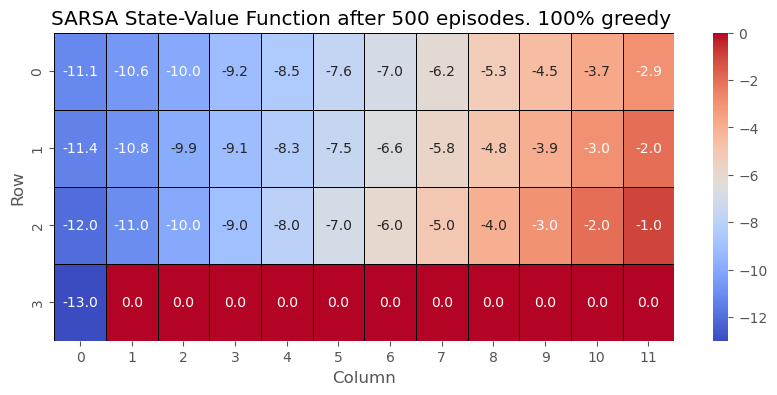

In [35]:
import seaborn as sns

# creation of heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(reshaped_v_sarsa_greedy, annot=True, fmt=".1f", cmap="coolwarm", cbar=True, linewidths=0.5, linecolor='black')

# Title
plt.title("SARSA State-Value Function after 500 episodes. 100% greedy ")
plt.xlabel("Column")
plt.ylabel("Row")

# Show heatmap
plt.show()

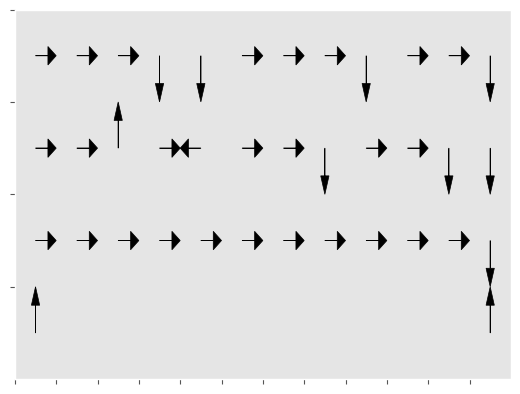

In [36]:
# Map policy values to directions
# Note: Assuming 0=UP, 1=RIGHT, 2=DOWN, 3=LEFT, -1=no action
directions = {
    0: (0, -1),
    1: (1, 0),
    2: (0, 1),
    3: (-1, 0),
    -1: (0, 0)  # No movement for -1
}

fig, ax = plt.subplots()

# Size of the grid
nrows, ncols = reshaped_policy_sarsa_greedy.shape

# Create a grid of points
ax.set_xlim(0, ncols)
ax.set_ylim(0, nrows)
plt.gca().invert_yaxis()  # Invert y axis to have the first row at the top

# Plot arrows for each policy direction
for y in range(nrows):
    for x in range(ncols):
        dx, dy = directions[reshaped_policy_sarsa_greedy[y, x]]
        if reshaped_policy_sarsa_greedy[y, x] != -1:  # If action is defined
            ax.arrow(x + 0.5, y + 0.5, dx * 0.3, dy * 0.3, head_width=0.2, head_length=0.2, fc='k', ec='k')

# Additional settings for clarity
ax.set_xticks(np.arange(0, ncols, 1))
ax.set_yticks(np.arange(0, nrows, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(which='both')

plt.show()

## Q-LEARNING WITH 100% GREEDY

In [37]:
def q_learning_greedy(env, num_episodes, discount_factor=1.0, alpha=0.5, epsilon=0):
    """
    Q-Learning algorithm: Off-policy TD control.
    Finds the optimal epsilon-greedy policy.
    
    Args:
        env: OpenAI environment.
        num_episodes: Number of episodes to run for.
        discount_factor: Gamma (γ) discount factor --> it reflects how much future rewards are taken into account. 
        A value of 1.0 means the agent is considering all future rewards equally.
        alpha: Step size (α), TD learning rate --> it controls how much the agent learns from new experiences. 
        Higher values mean the agent will rely more on the most recent updates.
        epsilon: Probability to sample a random action, float between 0 and 1. --> it is the exploraiton rate
        It controls how often the agent explores versus exploits known information. 
        Lower values mean more exploitation of the best-known strategy.
    
    Returns:
        A tuple (Q, stats) where Q is the optimal action-value function, 
        a dictionary mapping state -> action values, and stats is an EpisodeStats 
        object with two numpy arrays for episode_lengths and episode_rewards.
    """
    
    # Initialize the action-value function Q with zeros for all state-action pairs.
    Q_qlearning = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # Keeps track of useful statistics
    stats_qlearning = EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))

    # The policy we're following
    policy_qlearning = make_epsilon_greedy_policy(Q_qlearning, epsilon, env.action_space.n)
    #policy: An epsilon-greedy policy derived from the current Q-values, which means 
    #the agent mostly chooses the action with the highest Q-value but occasionally 
    #selects a random action with probability epsilon.
    
    for i_episode in range(num_episodes):
        # Print progress every 100 episodes
        if (i_episode + 1) % 100 == 0:
            print(f"Episode {i_episode + 1}/{num_episodes} completed.")
        
        # Initialize the state
        state, _ = env.reset() if isinstance(env.reset(), tuple) else (env.reset(), {})
        #For each episode, the current state state is reset using env.reset().
        
        # Loop for each step of the episode
        for t in itertools.count():
            # Choose action A from state S using policy derived from Q (epsilon-greedy)
            action_probabilities = policy_qlearning(state)
            action = np.random.choice(np.arange(len(action_probabilities)), p=action_probabilities)
            #At each step of the episode, the agent selects an action according to the epsilon-greedy policy 
            #(a mix of exploration and exploitation).
            
            # Take action A, observe R, S'
            next_state, reward, is_terminal, truncated, _ = env.step(action)
            #The agent takes the chosen action, and the environment returns the next_state, reward, and 
            #whether the episode has ended
            
            # Update Q(S,A) := Q(S,A) + α[R + γmax_a Q(S',A') - Q(S,A)]
            # The agent updates the Q-value for the current state-action pair using 
            # the Q-learning update formula
            td_target = reward + discount_factor * np.max(Q_qlearning[next_state])
            td_error = td_target - Q_qlearning[state][action]
            Q_qlearning[state][action] += alpha * td_error

            # Update statistics
            stats_qlearning.episode_rewards[i_episode] += reward
            stats_qlearning.episode_lengths[i_episode] = t + 1  # t starts from 0

            # End the episode if in terminal state
            #The loop breaks when the agent reaches a terminal state or the episode is truncated 
            if is_terminal or truncated:
                break
            
            # S ← S'
            state = next_state

    return Q_qlearning, stats_qlearning


## EXTRACTING THE Q-VALUES and OPTIMAL POLICY from Q-LEARNING
after 500 episodes

In [38]:
Q_qlearning, stats_qlearning = q_learning_greedy(env, 500) #we are training the agent, stats_sarsa = sarsa(env, 500)

Episode 100/500 completed.
Episode 200/500 completed.
Episode 300/500 completed.
Episode 400/500 completed.
Episode 500/500 completed.


In [39]:
# get greedy policy from Q_sarsa
policy_Q_qlearning_greedy= np.array([np.argmax(Q_qlearning[key]) if key in Q_qlearning else -1 for key in np.arange(48)])
reshaped_policy_Q_qlearning_greedy = np.reshape(policy_Q_qlearning_greedy, (4, 12))


# get value function from Q using greedy policy
v_Q_qlearning_greedy= ([np.max(Q_qlearning[key]) if key in Q_qlearning else 0 for key in np.arange(48)])
reshaped_v_Q_qlearning_greedy= np.reshape(v_Q_qlearning_greedy, (4, 12))

In [40]:
reshaped_policy_Q_qlearning_greedy

array([[ 0,  0,  1,  1,  0,  1,  2,  3,  2,  2,  2,  2],
       [ 1,  0,  3,  1,  1,  1,  1,  1,  2,  1,  1,  2],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2],
       [ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0]])

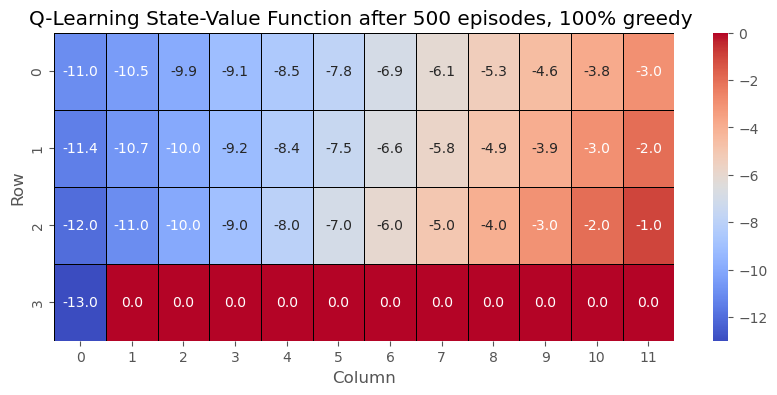

In [41]:
import seaborn as sns

# creation of heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(reshaped_v_Q_qlearning_greedy, annot=True, fmt=".1f", cmap="coolwarm", cbar=True, linewidths=0.5, linecolor='black')

# Title
plt.title("Q-Learning State-Value Function after 500 episodes, 100% greedy ")
plt.xlabel("Column")
plt.ylabel("Row")

# Show heatmap
plt.show()

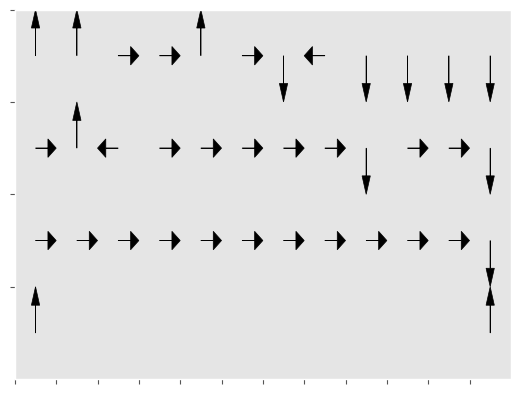

In [42]:
# Map policy values to directions
# Note: Assuming 0=UP, 1=RIGHT, 2=DOWN, 3=LEFT, -1=no action
directions = {
    0: (0, -1),
    1: (1, 0),
    2: (0, 1),
    3: (-1, 0),
    -1: (0, 0)  # No movement for -1
}

fig, ax = plt.subplots()

# Size of the grid
nrows, ncols = reshaped_policy_Q_qlearning_greedy.shape

# Create a grid of points
ax.set_xlim(0, ncols)
ax.set_ylim(0, nrows)
plt.gca().invert_yaxis()  # Invert y axis to have the first row at the top

# Plot arrows for each policy direction
for y in range(nrows):
    for x in range(ncols):
        dx, dy = directions[reshaped_policy_Q_qlearning_greedy[y, x]]
        if reshaped_policy_Q_qlearning_greedy[y, x] != -1:  # If action is defined
            ax.arrow(x + 0.5, y + 0.5, dx * 0.3, dy * 0.3, head_width=0.2, head_length=0.2, fc='k', ec='k')

# Additional settings for clarity
ax.set_xticks(np.arange(0, ncols, 1))
ax.set_yticks(np.arange(0, nrows, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(which='both')

plt.show()